In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [44]:
stats_df = pd.read_csv('../PBR_Analytics/Resources/BullRiders.csv')

In [45]:
stats_df.head()

,Rider,PBRrank,YearBorn,Height,Weight,YearsPro,Season,Events,BuckOuts,Rides,CupPoints,Place,RidePer,Wins,Top5,Top10,FinalPoints,Earnings
0,Silvano Alves,1,1987,67,150,5,2012,29,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
1,Marco Eguchi,2,1989,67,135,5,2012,29,84,39,7699.25,9,0.46,1,9,11,571.00,226255.50
2,Cody Nance,3,1987,68,162,7,2012,28,76,29,5068.25,16,0.38,1,4,7,322.00,131580.54
3,Shane Proctor,5,1985,68,165,8,2012,13,32,8,1387.50,35,0.25,0,0,3,0.00,52443.96
4,Fabian Vieria,7,1982,68,175,7,2012,23,70,38,7677.25,10,0.54,2,5,11,171.75,191399.08


In [46]:
#Previewing dtypes for potential errors
stats_df.dtypes

Rider           object
PBRrank          int64
YearBorn         int64
Height           int64
Weight           int64
YearsPro         int64
Season           int64
Events           int64
BuckOuts         int64
Rides            int64
CupPoints      float64
Place            int64
RidePer        float64
Wins             int64
Top5             int64
Top10            int64
FinalPoints    float64
Earnings       float64
dtype: object

## Pre-Processing Data

In [47]:
#Filling NAs with 0s
statscl_df = stats_df.fillna(0)

#Creatig Value scores for Earnings and Final Points and adding them to the df
#value score by Final Points
value_score =(statscl_df['Rides'] - statscl_df['Wins'])/statscl_df['FinalPoints']
statscl_df['Value_Score'] = value_score
#Value score by Earnings
value_score1 =((statscl_df['Rides'] - statscl_df['Wins'])/statscl_df['Earnings'])*1000
statscl_df['Value_ScoreE'] = value_score1

In [48]:
statscl_df.head(10)

,Rider,PBRrank,YearBorn,Height,Weight,YearsPro,Season,Events,BuckOuts,Rides,CupPoints,Place,RidePer,Wins,Top5,Top10,FinalPoints,Earnings,Value_Score,Value_ScoreE
0,Silvano Alves,1,1987,67,150,5,2012,29,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61,0.036408,0.040970
1,Marco Eguchi,2,1989,67,135,5,2012,29,84,39,7699.25,9,0.46,1,9,11,571.00,226255.50,0.066550,0.167952
2,Cody Nance,3,1987,68,162,7,2012,28,76,29,5068.25,16,0.38,1,4,7,322.00,131580.54,0.086957,0.212797
3,Shane Proctor,5,1985,68,165,8,2012,13,32,8,1387.50,35,0.25,0,0,3,0.00,52443.96,inf,0.152544
4,Fabian Vieria,7,1982,68,175,7,2012,23,70,38,7677.25,10,0.54,2,5,11,171.75,191399.08,0.209607,0.188089
5,J.B. Mauney,8,1987,70,140,8,2012,26,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27,0.128920,0.118082
6,Aaron Roy,9,1987,71,165,7,2012,28,71,22,3108.50,26,0.31,0,2,4,0.00,127554.50,inf,0.172475
7,Guilherme Marchi,10,1982,70,180,14,2012,29,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67,0.019050,0.144831
8,Mike Lee,11,1983,68,140,12,2012,20,64,33,6088.00,13,0.52,1,5,7,1011.75,147952.34,0.031628,0.216286
9,Chase Outlaw,12,1992,65,150,2,2012,23,64,21,4186.50,21,0.33,1,3,8,0.00,170203.48,inf,0.117506


# Creating Quick Interactive Table

In [49]:
#Setting Up DataFrame Interactive Pipeline
idf = stats_df.interactive()

In [50]:
#Adding Earnings Widget
earnings_slider = pn.widgets.IntSlider(name='Earnings Slider', start = 0, end = 1500000, step=10000)
earnings_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'d59d8d60-2f62-4406-b3bf-cc6573998691': {'defs': …

IntSlider(end=1500000, name='Earnings Slider', step=10000)

In [51]:
#Radio buttons for Riders
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Earnings'],
    button_type='success'
)

In [52]:
#creating riders list 
riders_list = statscl_df['Rider'].tolist()

In [53]:
yaxis_pipeline = (
    idf[
        (idf.Earnings <= earnings_slider) &
        (idf.Rider.isin(riders_list))
    ]
    .groupby(['Rider', 'FinalPoints'])[yaxis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Earnings', ascending=False)
    .reset_index(drop=True)
)

In [54]:
yaxis_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'16f1635c-64d2-4279-96d4-76e7c4993fd7': {'defs': …

In [55]:
total_riders = len(stats_df.Rider.unique())
total_riders

38

In [56]:
#Sorting by Value Score
valuescore_sort = statscl_df.sort_values('Value_Score', ascending=True)
valuescore_Earn = statscl_df.sort_values('Value_ScoreE', ascending=True)

In [57]:
#Scatter Plot by Earnings 
statscl_df.hvplot(x= 'Value_ScoreE', 
                  y= 'Earnings', 
                  kind = 'scatter',
                  c = 'Rider',
                  title = 'Value Score by Earnings vs. Earnings')

:Scatter   [Value_ScoreE]   (Earnings,Rider)

In [62]:
# Calculating Coefficents 
print(statscl_df['Value_ScoreE'].corr(statscl_df['Earnings']))

-0.32850881012890965


### Low inverse correlation

In [58]:
#ScatterPlot by Points
statscl_df.hvplot(x= 'Value_Score',
                  y= 'FinalPoints',
                  kind = 'scatter',
                  c = 'Rider',
                  title = 'Value Score vs. Final Points')

:Scatter   [Value_Score]   (FinalPoints,Rider)

In [63]:
print(statscl_df['Value_Score'].corr(statscl_df['FinalPoints']))

nan


Since NAN value using value score Earnings for correlation closely alligned to normal value score

In [65]:
print(statscl_df['Value_ScoreE'].corr(statscl_df['FinalPoints']))

-0.2944341074577815


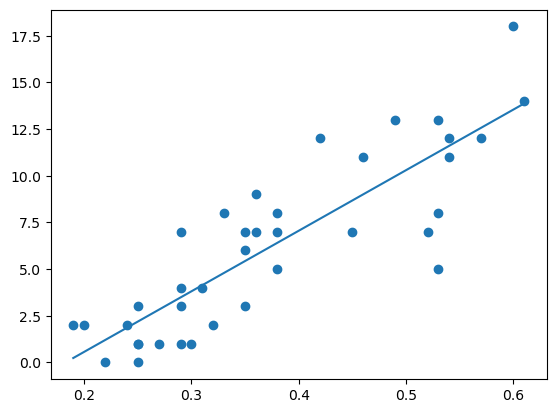

In [66]:
plt.scatter(statscl_df['RidePer'], statscl_df['Top10'])
plt.plot(np.unique(statscl_df['RidePer']), np.poly1d(np.polyfit(statscl_df['RidePer'], statscl_df['Top10'], 1))(np.unique(statscl_df['RidePer'])))
plt.show()

In [67]:
print(statscl_df['RidePer'].corr(statscl_df['Top10']))


0.8554678661816156


High correlation score between RidePer vs Top10 placements